# Лабораторная работа №2

ФИО: Хайдукова Мария Игоревна

Группа: БИВТ-23-СП-3

In [2]:
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import kagglehub

## 1. Пример импорта данных

In [4]:
data = pd.read_csv('data/students_adaptability_level_online_education.csv')

In [16]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


## 2. Описание постановки задачи

Исходя из информации, представленной на сайте, можно заключить, что от нас требуют изучить, **насколько эффективно онлайн-обучение**.  
Это возможность опробовать некоторые методы прогнозирования уровня адаптации учащихся в онлайн-образовании с помощью подходов машинного обучения.

Перечисляются следующие переменные:  
- Gender  
- Age
- Education Level  
- Institution Type  
- IT Student  
- Location in Town  
- Load-shedding  
- Financial Condition  
- Internet Type  
- Network Type  
- Class Duration  
- Self LMS  
- Device  

Целевой переменной является:  
- **Adaptivity level**  

Целевая переменная является дискретной, так как представлена всего 3 значениями:  
`['Moderate', 'Low', 'High']`

In [13]:
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [14]:
data['Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

## 3. Распределение целевой переменной

#### Построим гистограмму для целевой переменной:

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64


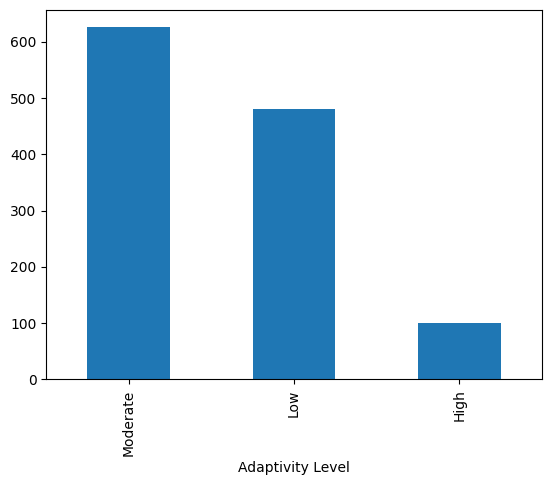

In [67]:
data['Adaptivity Level'].value_counts().plot(kind='bar')
print(data['Adaptivity Level'].value_counts())

---
Из построенного графика можно заметить, что распределение неоднородно, количество значений в группе `Moderate` самое большое, а `High` сильно меньше остальных, что может повлиять на дальнейшее смещение.

Количество уникальных значений целевой переменной:

In [32]:
data['Adaptivity Level'].nunique()

3

## 4. Статистика по переменным

In [35]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


#### Почему не вывелись mean, max и другие функции, работающие с **числами**? Потому что все типы, содержащиеся в таблицы относятся к текстовым

In [37]:
data.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

## 5. Вся информация по ДС

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


---
##### Информация, которую мы получили:  
- нет пропущенных значений
- все данные относятся к типу object
- всего 1205 строк, где индексы от 0 до 1204
- 14 колонок и тп

## 6. Сколько пропусков

In [53]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

## 7. Гистограммы 5 признаков

### №1 Признак возраста
По признаку возраста можно увидеть распределение людей, принявших наибольшее участие в эксперименте.  
Так, на графике мы видим, что данные сосредоточены в диапазоне `11-25` лет

- Пик в группе `21-25`, `11-15`, `16-20`
- Наблюдается мультимодальность (несколько пиков)
- Правосторонняя ассиметрия (если возраст по возрастанию расположить)

Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: count, dtype: int64


<Axes: xlabel='Age'>

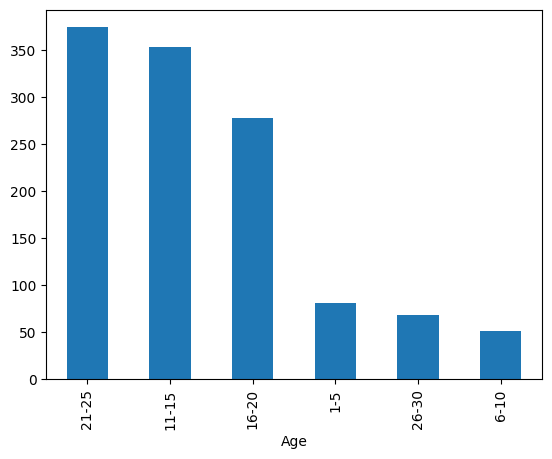

In [99]:
print(data['Age'].value_counts())
data['Age'].value_counts().plot(kind='bar')

### №2 Признак уровня образования
Из гистограммы видно преобладание количества школьников, когда людей из колледжа в два раза меньше, что тоже показывает неравномерность значений и ассиметрию

- Пик в группе `School`, `University`
- Наблюдается мультимодальность (несколько пиков)

Education Level
School        530
University    456
College       219
Name: count, dtype: int64


<Axes: xlabel='Education Level'>

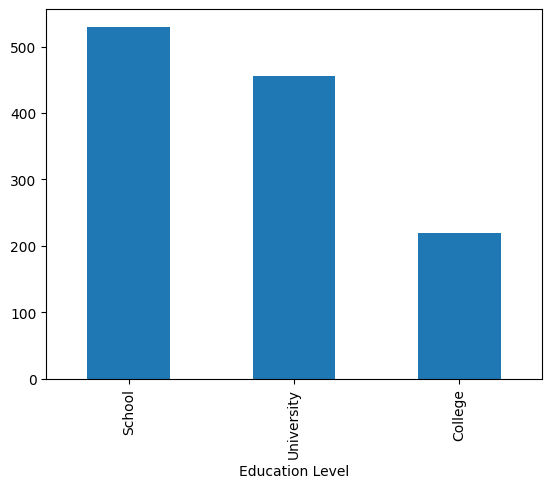

In [100]:
print(data['Education Level'].value_counts())
data['Education Level'].value_counts().plot(kind='bar')

### №3 Признак IT student
Видно, что большинство студентов не из IT отрасли, что тоже говорит о дисбалансе признака

- Унимодальное распределение

IT Student
No     901
Yes    304
Name: count, dtype: int64


<Axes: xlabel='IT Student'>

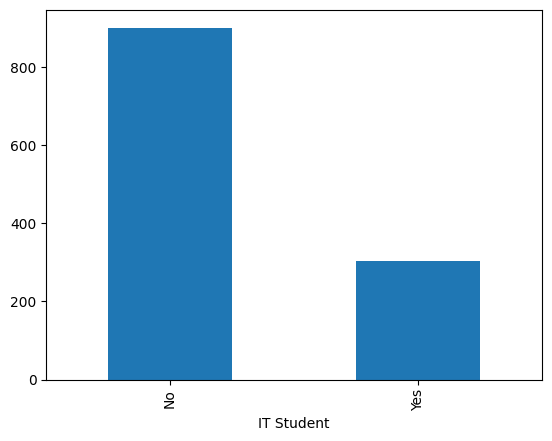

In [102]:
print(data['IT Student'].value_counts())
data['IT Student'].value_counts().plot(kind='bar')

### №4 Признак финансового состояния семьи
Видно, что график ассиметричный, так как отчетливо `Mid` перевешивает другие значения

- Унимодальное распределение
- Пик в `Mid`

Financial Condition
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64


<Axes: xlabel='Financial Condition'>

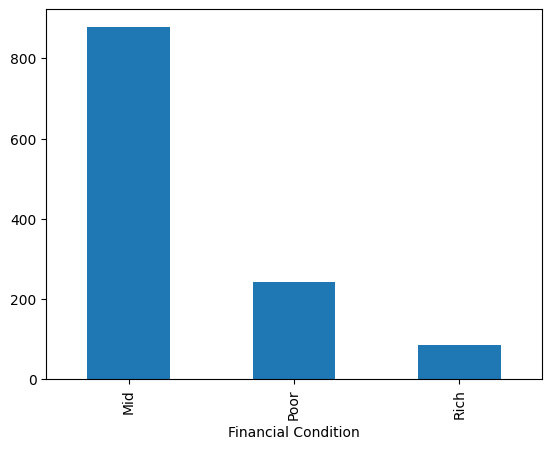

In [104]:
print(data['Financial Condition'].value_counts())
data['Financial Condition'].value_counts().plot(kind='bar')

### №5 Признак пола
Видно, что величины наконец-то распределены сбалансированно, что не создаст смещений и некорректности предсказывания модели

- Отсуствует ассиметрия
- Разница незначеительная

Gender
Boy     663
Girl    542
Name: count, dtype: int64


<Axes: xlabel='Gender'>

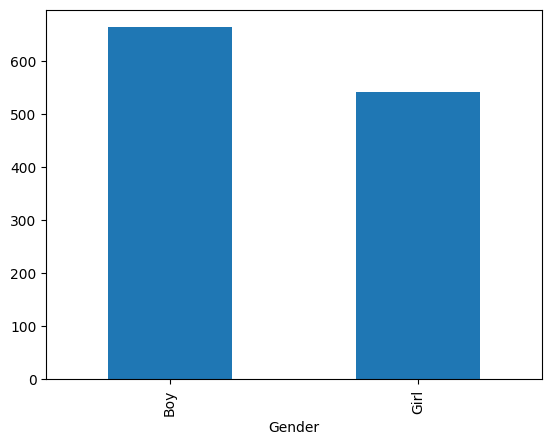

In [105]:
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot(kind='bar')

## 8. Графики зависимости переменных с целевой

### №1 Признак возраста
Хочется сразу выделить возрастную группу `1-5` лет, которая выглядит некорректно для онлайн-образования (Moderate = 79%), как и `6-10` (High = 33%)

- На диаграмме нет четкой тенденции, так как все уровни адаптивности присутствуют во всех возрастах без явных зависимостей
- Корреляция практически отсутствует

<Axes: xlabel='Age', ylabel='count'>

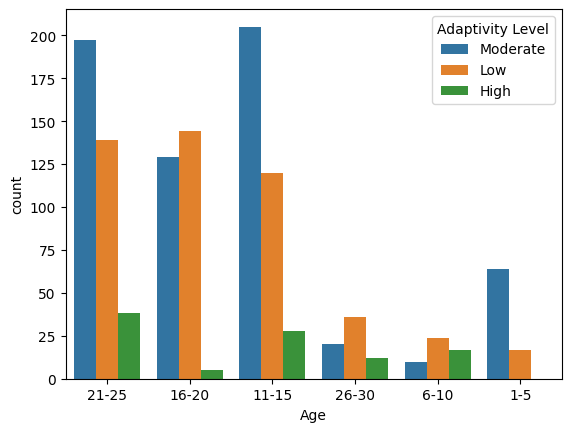

In [218]:
sns.countplot(data=data, x='Age', hue='Adaptivity Level')

### №2 Признак пола

В обеих группах сохраняется тенденция:
- `Moderate` - наиболее частый
- `Low` - средняя частота
- `High` - наименее частый

Можно заключить по идентичности для обеих групп, что взаимосвязь мала

<Axes: xlabel='Gender', ylabel='count'>

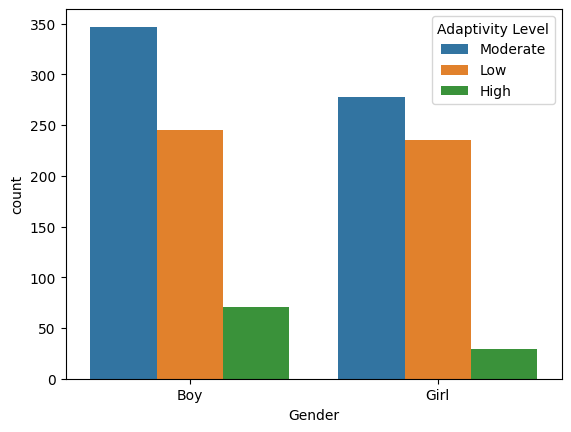

In [219]:
sns.countplot(data=data, x='Gender', hue='Adaptivity Level')

### №3 Признак уровня образования

- `Low` наибольшая у `College`
- Наивысшие показатели (`High`, `Moderate`) у `School` и `University`
- Самое низкое `high` у колледжа

На графике видна взаимосвязь, которая может повлиять на целевую переменную

<Axes: xlabel='Education Level', ylabel='count'>

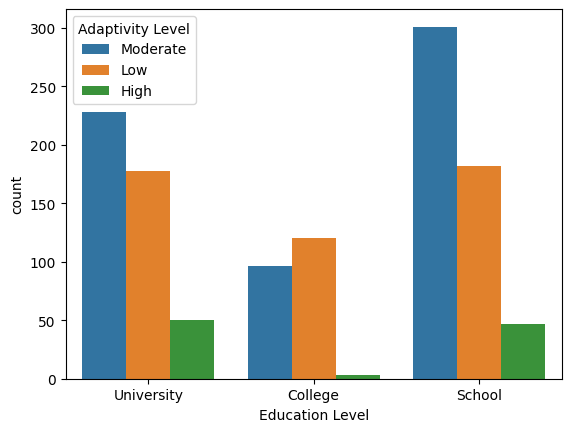

In [220]:
sns.countplot(data=data, x='Education Level', hue='Adaptivity Level')

### №4 Признак IT student

- Наилучшая тенденция прослеживается у `IT Student`, так как `Low` показатель в 2 раза ниже, а также возрастают остальные два значения `High` и `Moderate`

Повлияет на целевую переменную

<Axes: xlabel='IT Student', ylabel='count'>

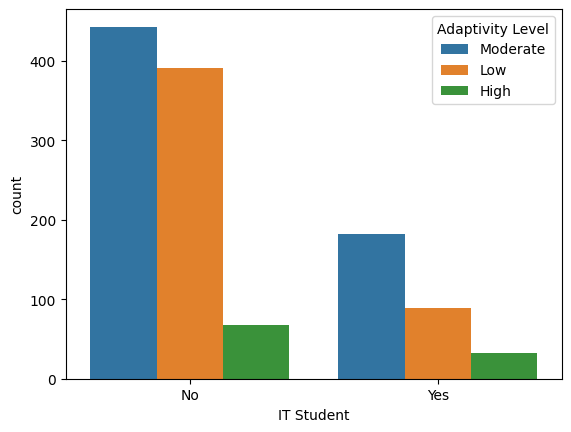

In [221]:
sns.countplot(data=data, x='IT Student', hue='Adaptivity Level')

### №5 Признак финансового состояния семьи

Сильная взаимосвязь, которая с повышением уровня состояния семьи повышает адаптивность студента к онлайн-образованию

<Axes: xlabel='Financial Condition', ylabel='count'>

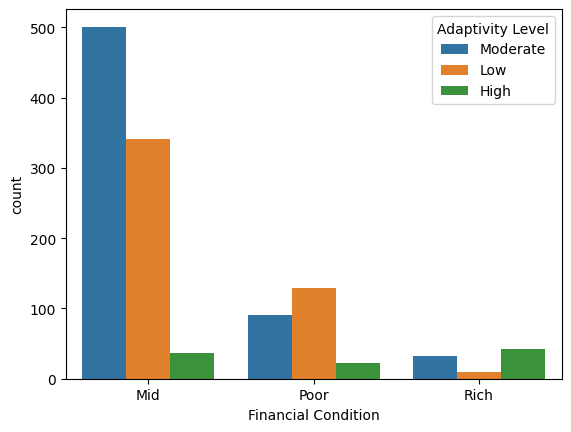

In [222]:
sns.countplot(data=data, x='Financial Condition', hue='Adaptivity Level')

## 9. Зависимость двух переменных от целевой

<Axes: xlabel='Adaptivity Level', ylabel='Age_IT'>

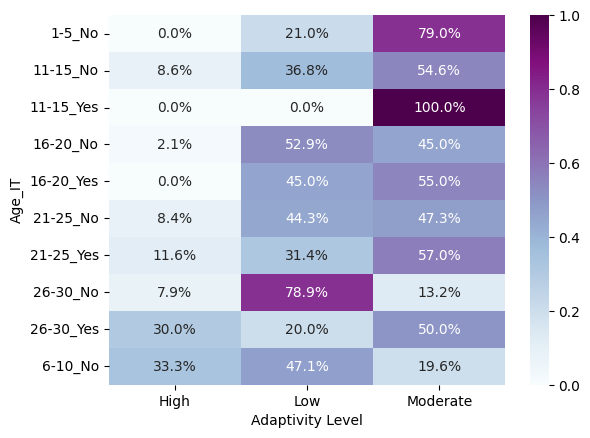

In [194]:
data['Age_IT'] = data['Age'] + '_' + data['IT Student']
cross_tab = pd.crosstab(data['Age_IT'], data['Adaptivity Level'], normalize='index')

sns.heatmap(cross_tab, annot=True, fmt='.1%', cmap='BuPu')